I am trying to find out if there is a correlation between observations and conservation status. 

In [109]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd

In [110]:
# Import observations data
observ = 'observations.csv'
observ_data = pd.read_csv(observ)
observ_data = observ_data.sort_values(by=['scientific_name'])
observ_data.head()

,scientific_name,park_name,observations
8050,Abies bifolia,Yellowstone National Park,215
4968,Abies bifolia,Bryce National Park,109
17990,Abies bifolia,Great Smoky Mountains National Park,72
20930,Abies bifolia,Yosemite National Park,136
4647,Abies concolor,Great Smoky Mountains National Park,101


In [111]:
len(spec_i_data)+ len(observ_data)

29120

In [112]:
# Import species info data
spec_i = 'species_info.csv'
spec_i_data = pd.read_csv(spec_i)
spec_i_data = spec_i_data.sort_values(by=['scientific_name'])
spec_i_data.head()

,category,scientific_name,common_names,conservation_status
4061,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN
5443,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN
1928,Vascular Plant,Abies fraseri,Fraser Fir,Species of Concern
2908,Nonvascular Plant,Abietinella abietina,Abietinella Moss,NaN
3736,Vascular Plant,Abronia ammophila,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern


In [113]:
# Merge the two DataFrames
all_data = pd.merge(spec_i_data, observ_data)
all_data.sort_values(by=['scientific_name','observations'])

,category,scientific_name,common_names,conservation_status,park_name,observations
2,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Great Smoky Mountains National Park,72
1,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Bryce National Park,109
3,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yosemite National Park,136
0,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yellowstone National Park,215
7,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Bryce National Park,83
...,...,...,...,...,...,...
25626,Nonvascular Plant,Zygodon viridissimus,Zygodon Moss,NaN,Yellowstone National Park,270
25628,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Bryce National Park,102
25631,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Great Smoky Mountains National Park,102
25629,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Yosemite National Park,210


In [114]:
# I want to see how many rows have missing values in each column
all_data.isna().sum()

category                   0
scientific_name            0
common_names               0
conservation_status    24752
park_name                  0
observations               0
dtype: int64

In [118]:
# Dropping all null values in conservation_status column
all_data.dropna( inplace = True)

In [119]:
# Drop the park_name column
all_data.drop(['park_name'], axis = 1)

,category,scientific_name,common_names,conservation_status,observations
8,Vascular Plant,Abies fraseri,Fraser Fir,Species of Concern,109
9,Vascular Plant,Abies fraseri,Fraser Fir,Species of Concern,218
10,Vascular Plant,Abies fraseri,Fraser Fir,Species of Concern,110
11,Vascular Plant,Abies fraseri,Fraser Fir,Species of Concern,81
16,Vascular Plant,Abronia ammophila,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern,72
...,...,...,...,...,...
25435,Bird,Wilsonia pusilla,Wilson's Warbler,Species of Concern,108
25596,Vascular Plant,Zizia trifoliata,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,135
25597,Vascular Plant,Zizia trifoliata,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,238
25598,Vascular Plant,Zizia trifoliata,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,87


In [120]:
# Aggregating rows and making sure that we sum observation values
agg_functions = {'observations': 'sum', 
                 'category': 'first',
                 'scientific_name': 'first',
                 'common_names': 'first',
                 'conservation_status': 'first',}

all_data_new = all_data.groupby(all_data['scientific_name']).aggregate(agg_functions)

In [121]:
all_data_new.sort_values(by=['observations'])

,observations,category,scientific_name,common_names,conservation_status
scientific_name,,,,,
Grus americana,131,Bird,Grus americana,Whooping Crane,Endangered
Canis rufus,137,Mammal,Canis rufus,Red Wolf,Endangered
Vermivora bachmanii,141,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
Noturus baileyi,143,Fish,Noturus baileyi,Smoky Madtom,Endangered
Rana sierrae,144,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered
...,...,...,...,...,...
Riparia riparia,2084,Bird,Riparia riparia,"Bank Swallow, Sand Martin",Species of Concern
Eptesicus fuscus,2094,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern
Canis lupus,2145,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [146]:
# Create a function to plot the data with a scatter plot. 

X = all_data_new.conservation_status
y = all_data_new.observations

def plot_datas(X, y):
    plt.scatter(X, y)
    plt.xlabel("Conservation Status", fontsize=14)
    plt.ylabel("Number of Observations", fontsize=14)

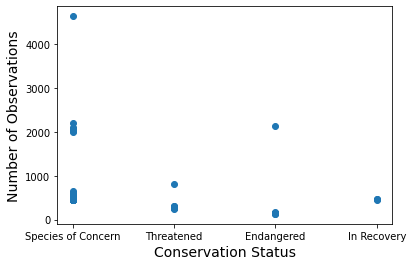

In [147]:
plot_datas(X, y)